# Bank customer churn using ANN 

In [ ]:
import numpy as np
import pandas as pd

In [73]:
df=pd.read_csv('Churn_Modelling.csv') # loading the data into pandas dataframe


In [74]:
df.head() # view the first 5 rows of dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
df.shape # know about rows/attributes and columns/features

(10000, 14)

In [76]:
df.columns # all the feature names in dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [77]:
df.info() # know about the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
# dropping the categorical columns
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [79]:
df 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [80]:
df.dtypes # datatypes of the features

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [81]:
df.isnull().any() #check for null values in all the columns 

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [82]:
df[df.Exited==0] #knowing about the features where customers didnot churn 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [83]:
df[df.Exited==0].describe() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


from the above, we can observe that average age of customers who didnt exited is 37 years and have an avg credit score of 651 and an avg tenure of 5 years and a max of 10 years

In [84]:
df[df.Exited==1].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


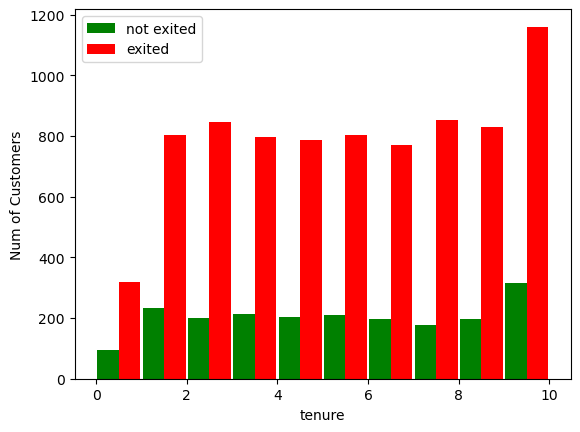

In [164]:
from matplotlib import pyplot as plt
%matplotlib inline
tenure_churn_no=df[df.Exited==0].Tenure
tenure_churn_yes=df[df.Exited==1].Tenure
plt.xlabel('tenure')
plt.ylabel('Num of Customers')
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['not exited','exited'])
plt.legend()

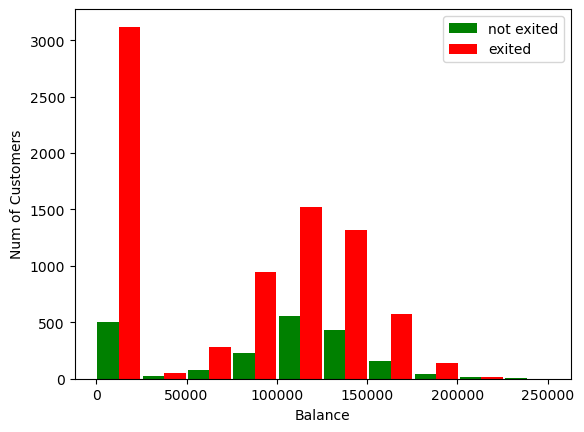

In [86]:
Balance_churn_no=df[df.Exited==0].Balance
Balance_churn_yes=df[df.Exited==1].Balance
plt.xlabel('Balance')
plt.ylabel('Num of Customers')
plt.hist([Balance_churn_yes,Balance_churn_no],rwidth=0.95,color=['green','red'],label=['not exited','exited'])
plt.legend()

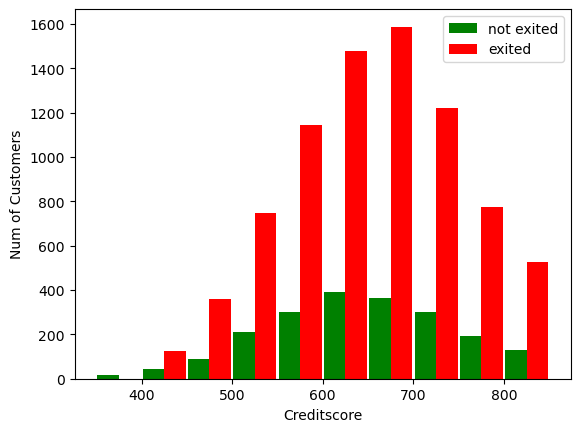

In [165]:
credit_churn_no=df[df.Exited==0].CreditScore
credit_churn_yes=df[df.Exited==1].CreditScore
plt.xlabel('Creditscore')
plt.ylabel('Num of Customers')
plt.hist([credit_churn_yes,credit_churn_no],rwidth=0.95,color=['green','red'],label=['not exited','exited'])
plt.legend()

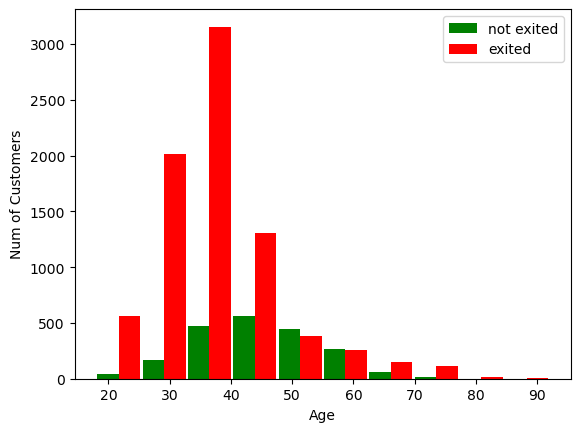

In [166]:
age_churn_no=df[df.Exited==0].Age
age_churn_yes=df[df.Exited==1].Age
plt.xlabel('Age')
plt.ylabel('Num of Customers')
plt.hist([age_churn_yes,age_churn_no],rwidth=0.95,color=['green','red'],label=['not exited','exited'])
plt.legend()

In [87]:
for i in df:
    if df[i].dtypes=='object':
        print(f'{i}: {df[i].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [88]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True) # replace categorical values

In [89]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [90]:
df1=pd.get_dummies(df)

In [91]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [92]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary']
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])


In [96]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,3,0.299226,2,1,0,0.464429,1,0,1,0


In [111]:
x=df1.drop('Exited',axis='columns')
y=df1['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
x_train.shape

(8000, 12)

In [113]:
x_test.shape

(2000, 12)

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='tanh'),
    keras.layers.Dense(8,activation=LeakyReLU(alpha=0.01)),
    keras.layers.Dense(4,activation=LeakyReLU(alpha=0.01)),
    keras.layers.Dense(2,activation=LeakyReLU(alpha=0.01)),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
250/250 [==============================] - 0s 398us/step - loss: 0.5207 - accuracy: 0.7935
Epoch 2/300
250/250 [==============================] - 0s 391us/step - loss: 0.4883 - accuracy: 0.7945
Epoch 3/300
250/250 [==============================] - 0s 384us/step - loss: 0.4662 - accuracy: 0.7945
Epoch 4/300
250/250 [==============================] - 0s 383us/step - loss: 0.4462 - accuracy: 0.7965
Epoch 5/300
250/250 [==============================] - 0s 380us/step - loss: 0.4310 - accuracy: 0.8046
Epoch 6/300
250/250 [==============================] - 0s 383us/step - loss: 0.4159 - accuracy: 0.8136
Epoch 7/300
250/250 [==============================] - 0s 384us/step - loss: 0.4019 - accuracy: 0.8163
Epoch 8/300
250/250 [==============================] - 0s 380us/step - loss: 0.3913 - accuracy: 0.8307
Epoch 9/300
250/250 [==============================] - 0s 382us/step - loss: 0.3804 - accuracy: 0.8388
Epoch 10/300
250/250 [==============================] - 0s 380us/step - l

250/250 [==============================] - 0s 385us/step - loss: 0.3478 - accuracy: 0.8561
Epoch 80/300
250/250 [==============================] - 0s 378us/step - loss: 0.3466 - accuracy: 0.8565
Epoch 81/300
250/250 [==============================] - 0s 377us/step - loss: 0.3460 - accuracy: 0.8577
Epoch 82/300
250/250 [==============================] - 0s 378us/step - loss: 0.3470 - accuracy: 0.8570
Epoch 83/300
250/250 [==============================] - 0s 378us/step - loss: 0.3469 - accuracy: 0.8579
Epoch 84/300
250/250 [==============================] - 0s 378us/step - loss: 0.3472 - accuracy: 0.8570
Epoch 85/300
250/250 [==============================] - 0s 377us/step - loss: 0.3451 - accuracy: 0.8586
Epoch 86/300
250/250 [==============================] - 0s 377us/step - loss: 0.3455 - accuracy: 0.8580
Epoch 87/300
250/250 [==============================] - 0s 378us/step - loss: 0.3488 - accuracy: 0.8570
Epoch 88/300
250/250 [==============================] - 0s 377us/step - loss:

250/250 [==============================] - 0s 391us/step - loss: 0.3375 - accuracy: 0.8606
Epoch 158/300
250/250 [==============================] - 0s 374us/step - loss: 0.3380 - accuracy: 0.8621
Epoch 159/300
250/250 [==============================] - 0s 370us/step - loss: 0.3387 - accuracy: 0.8574
Epoch 160/300
250/250 [==============================] - 0s 369us/step - loss: 0.3385 - accuracy: 0.8605
Epoch 161/300
250/250 [==============================] - 0s 369us/step - loss: 0.3388 - accuracy: 0.8591
Epoch 162/300
250/250 [==============================] - 0s 369us/step - loss: 0.3375 - accuracy: 0.8611
Epoch 163/300
250/250 [==============================] - 0s 367us/step - loss: 0.3386 - accuracy: 0.8599
Epoch 164/300
250/250 [==============================] - 0s 368us/step - loss: 0.3376 - accuracy: 0.8627
Epoch 165/300
250/250 [==============================] - 0s 369us/step - loss: 0.3383 - accuracy: 0.8597
Epoch 166/300
250/250 [==============================] - 0s 365us/ste

250/250 [==============================] - 0s 382us/step - loss: 0.3319 - accuracy: 0.8629
Epoch 236/300
250/250 [==============================] - 0s 389us/step - loss: 0.3311 - accuracy: 0.8643
Epoch 237/300
250/250 [==============================] - 0s 376us/step - loss: 0.3325 - accuracy: 0.8645
Epoch 238/300
250/250 [==============================] - 0s 722us/step - loss: 0.3313 - accuracy: 0.8612
Epoch 239/300
250/250 [==============================] - 0s 770us/step - loss: 0.3323 - accuracy: 0.8622
Epoch 240/300
250/250 [==============================] - 0s 466us/step - loss: 0.3320 - accuracy: 0.8626
Epoch 241/300
250/250 [==============================] - 0s 574us/step - loss: 0.3314 - accuracy: 0.8620
Epoch 242/300
250/250 [==============================] - 0s 392us/step - loss: 0.3311 - accuracy: 0.8618
Epoch 243/300
250/250 [==============================] - 0s 380us/step - loss: 0.3314 - accuracy: 0.8659
Epoch 244/300
250/250 [==============================] - 0s 380us/ste

In [134]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 399us/step - loss: 0.3394 - accuracy: 0.8605


[0.3393961787223816, 0.8604999780654907]

In [136]:
ypred=model.predict(x_test)
ypred

63/63 [==============================] - 0s 451us/step


array([[0.03617488],
       [0.02220389],
       [0.08528017],
       ...,
       [0.63895816],
       [0.09247412],
       [0.29413107]], dtype=float32)

In [137]:
yp=[]
for i in ypred:
    if i>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [138]:
yp

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [139]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yp))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Actual')

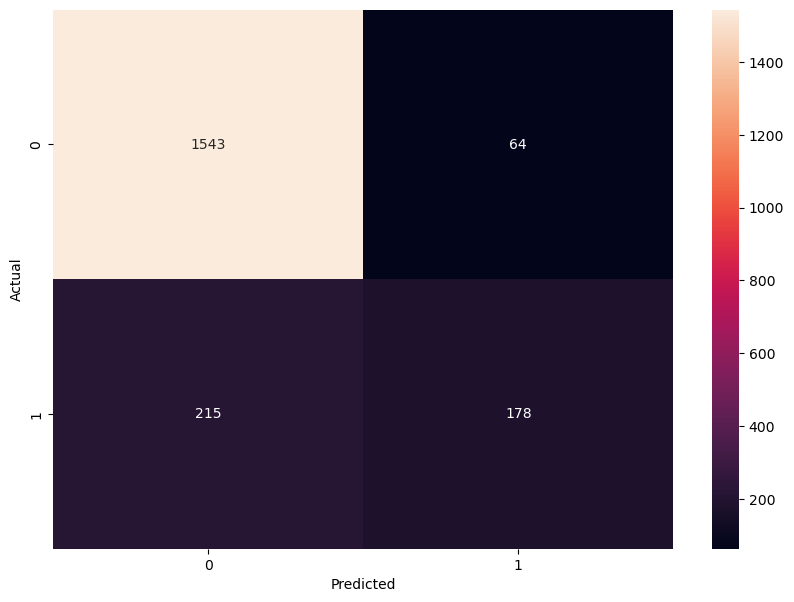

In [142]:
import seaborn as sns
conf_matrix=tf.math.confusion_matrix(y_test,yp)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [159]:
round((1543+178)/(1543+178+215+64),2) #accuracy of the model 

0.86

accuracy of simple ann model is 86%

In [160]:
round(1543/(1543+215),2) # Precision for 0 class 

0.88

In [161]:
round(178/(178+64),2) # precision for 1 class

0.74